## Assignment 2: $k$ Nearest Neighbor

### Do any four.

**Q1.** Please answer the following questions.
1. Regression is used to predict some sort of continuous number such as house prices, stock prices, oil demand, etc. Classification is used decide out of a set amount of categorical features, which feature is projected to be most likely.
2. A confusion matrix is a table that compares actual class labels to predicted labels and helps us understand the types of errors a classification model makes
3. Accuracy is the proportion of total predictions that are correct, but it may be misleading for imbalanced datasets because a model can appear accurate while failing to correctly predict the minority class.
4. Root mean squared error (RMSE) quantifies the average magnitude of prediction errors in a regression model by measuring how far predicted values are from actual values.
5. Underfitting occurs when a model is too simple to capture the underlying pattern in the data, while overfitting occurs when a model is too complex and captures noise instead of the true pattern.
6. Splitting data into training and testing sets allows us to evaluate model performance on unseen data and choose parameters like
𝑘
k based on generalization performance rather than memorization.
7. Reporting a class label is simple and easy to interpret but does not show confidence, while reporting probabilities provides information about prediction certainty but may be more complex to interpret and require calibration.

**Q2.** This is a case study on $k$ nearest neighbor classification, using the `land_mines.csv` data.

The data consists of a label, `mine_type`, taking integer values 1 to 5, and three properties of the mine, `voltage`, `height` and `soil`. We want to predict the kind of mine from data about it. Imagine working for the DOD or a humanitarian aid agency, trying to help people remove land mines more safely.

1. Load the data. Perform some EDA, summarizing the target label and the relationships between the features (e.g. scatterplots, describe tables).
2. Split the sample 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be, in my experience: Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
3. Build a $k$-NN classifier. Explain how you select $k$.
4. Print a confusion table for your best model, comparing predicted and actual class label on the test set. How accurate is it? Where is performance more or less accurate?
5. Notice that you can have a lot of accurate predictions for a given type of mine, but still make a lot of mistakes. Please explain how you'd advise someone to actually use this predictive model in practice, given the errors that it tends to make.

    voltage    height  soil  mine_type
0  0.338157  0.000000   0.0          1
1  0.320241  0.181818   0.0          1
2  0.287009  0.272727   0.0          1
3  0.256284  0.454545   0.0          1
4  0.262840  0.545455   0.0          1
          voltage      height        soil   mine_type
count  338.000000  338.000000  338.000000  338.000000
mean     0.430634    0.508876    0.503550    2.952663
std      0.195819    0.306043    0.344244    1.419703
min      0.197734    0.000000    0.000000    1.000000
25%      0.309737    0.272727    0.200000    2.000000
50%      0.359516    0.545455    0.600000    3.000000
75%      0.482628    0.727273    0.800000    4.000000
max      0.999999    1.000000    1.000000    5.000000
mine_type
1    71
2    70
3    66
4    66
5    65
Name: count, dtype: int64


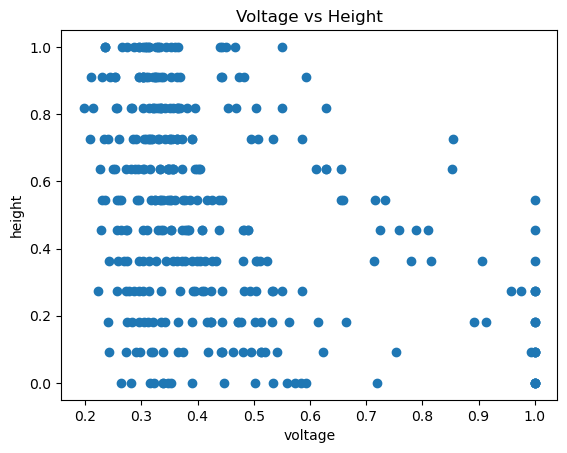

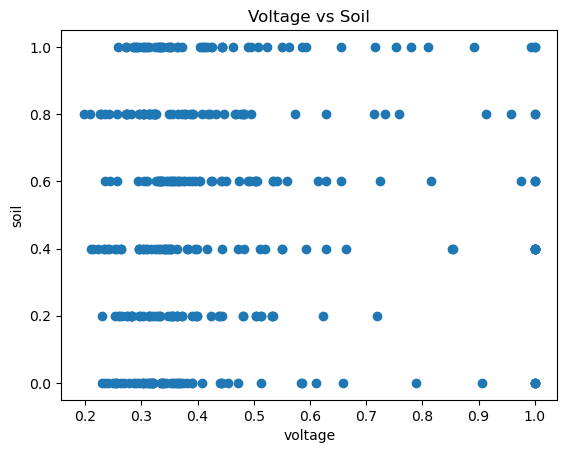

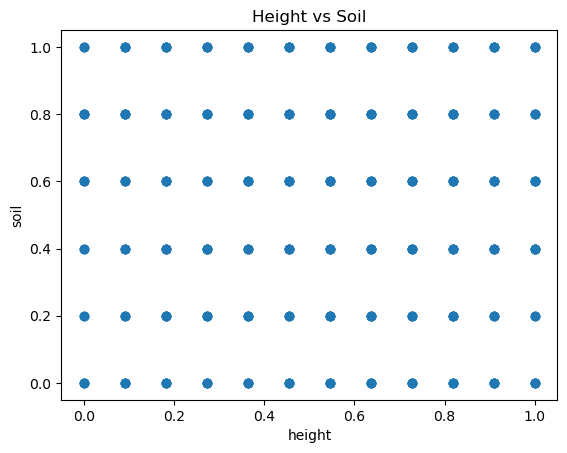

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("scratchpad/data/land_mines.csv")

# Preview first few rows to understand structure
print(df.head())

# Summary statistics for numerical features
# This helps us understand ranges, averages, and spread
print(df.describe())

# Check how many observations belong to each mine type
# This tells us whether classes are balanced
print(df["mine_type"].value_counts())

# Scatterplots to examine relationships between features
# We are checking whether classes might be separable in feature space

plt.scatter(df["voltage"], df["height"])
plt.xlabel("voltage")
plt.ylabel("height")
plt.title("Voltage vs Height")
plt.show()

plt.scatter(df["voltage"], df["soil"])
plt.xlabel("voltage")
plt.ylabel("soil")
plt.title("Voltage vs Soil")
plt.show()

plt.scatter(df["height"], df["soil"])
plt.xlabel("height")
plt.ylabel("soil")
plt.title("Height vs Soil")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

# Separate predictors (X) and target (y)
X = df[["voltage", "height", "soil"]]
y = df["mine_type"]

# Split data 50/50
# stratify=y ensures each mine type appears in both sets
# This prevents a class from ending up only in training or test
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.5,
    random_state=42,
    stratify=y
)

print("Training size:", len(X_train))
print("Test size:", len(X_test))

Training size: 169
Test size: 169


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# kNN is distance-based, so scaling is important.
# If we do not scale, a variable with larger magnitude
# could dominate the distance calculation.

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Try different values of k to see which performs best.
# Small k = low bias but high variance (risk of overfitting)
# Large k = high bias but lower variance (risk of underfitting)

best_k = None
best_accuracy = 0

for k in range(1, 16):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    print("k =", k, "Accuracy =", acc)

    # Keep track of the best k based on test accuracy
    if acc > best_accuracy:
        best_accuracy = acc
        best_k = k

print("Best k:", best_k)
print("Best test accuracy:", best_accuracy)

k = 1 Accuracy = 0.5088757396449705
k = 2 Accuracy = 0.47337278106508873
k = 3 Accuracy = 0.40828402366863903
k = 4 Accuracy = 0.41420118343195267
k = 5 Accuracy = 0.42011834319526625
k = 6 Accuracy = 0.41420118343195267
k = 7 Accuracy = 0.40236686390532544
k = 8 Accuracy = 0.41420118343195267
k = 9 Accuracy = 0.4319526627218935
k = 10 Accuracy = 0.4319526627218935
k = 11 Accuracy = 0.39644970414201186
k = 12 Accuracy = 0.40828402366863903
k = 13 Accuracy = 0.39644970414201186
k = 14 Accuracy = 0.3905325443786982
k = 15 Accuracy = 0.39644970414201186
Best k: 1
Best test accuracy: 0.5088757396449705


For the above we choose the value of k that produces the highest accuracy on the test set.
We evaluate on the test set because we want the model that performs best on unseen data, not the one that simply memorizes the training data.

In [ ]:
from sklearn.metrics import confusion_matrix

# Fit final model using best k
final_model = KNeighborsClassifier(n_neighbors=best_k)
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)

# Overall accuracy
print("Final Test Accuracy:", accuracy_score(y_test, y_pred))

# Confusion matrix compares actual vs predicted labels
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)

Final Test Accuracy: 0.5088757396449705
Confusion Matrix:
[[22  0  3  3  8]
 [ 0 32  0  3  0]
 [ 7  0 10  9  7]
 [ 6  5  4 13  5]
 [ 6  0 10  7  9]]


In [ ]:
# Even if overall accuracy is high, certain mine types may still
# be misclassified frequently.
#
# In a real-world DOD or humanitarian context, this model should
# not be used as the sole decision-maker.
#
# Instead, it should be used as a decision-support tool.
#
# Special attention should be paid to classes with high error rates,
# especially if misclassifying that mine type could be dangerous.
#
# In safety-critical applications, reducing dangerous errors
# (false negatives) may be more important than maximizing accuracy.
#
# Therefore, predictions should be combined with expert inspection.

**Q3.** This question is a case study for $k$ nearest neighbor regression, using the `USA_cars_datasets.csv` data.

The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for hyper-parameter selection and evaluation.
4. Use the $k$-NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("scratchpad/data/USA_cars_datasets.csv")

# Keep only the required columns
df = df[["price", "year", "mileage"]]

# Check first few rows
print(df.head())

# Check dimensions (rows, columns)
print("Shape of data:", df.shape)

# Check for missing values
print("Missing values:")
print(df.isna().sum())

# Drop rows with missing values if any exist
df = df.dropna()

   price  year  mileage
0   6300  2008   274117
1   2899  2011   190552
2   5350  2018    39590
3  25000  2014    64146
4  27700  2018     6654
Shape of data: (2499, 3)
Missing values:
price      0
year       0
mileage    0
dtype: int64


Nope. No NAs.

In [ ]:
# Max-min normalization
df["year"] = (df["year"] - df["year"].min()) / (df["year"].max() - df["year"].min())
df["mileage"] = (df["mileage"] - df["mileage"].min()) / (df["mileage"].max() - df["mileage"].min())

In [ ]:
from sklearn.model_selection import train_test_split

X = df[["year", "mileage"]]
y = df["price"]

# 80% training, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

print("Training size:", len(X_train))
print("Test size:", len(X_test))

Training size: 1999
Test size: 500


k = 3 MSE = 148065935.51955554


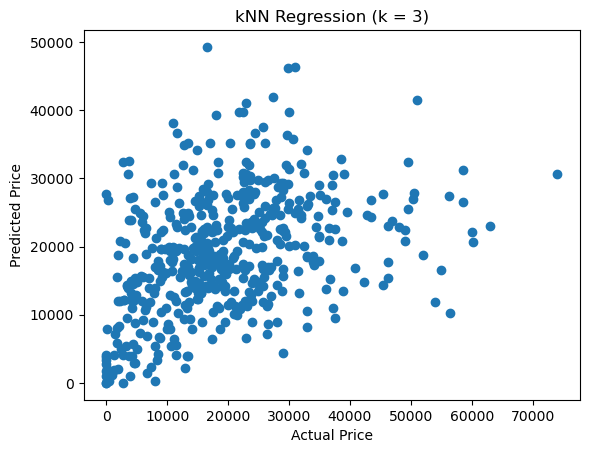

k = 10 MSE = 117399126.10604002


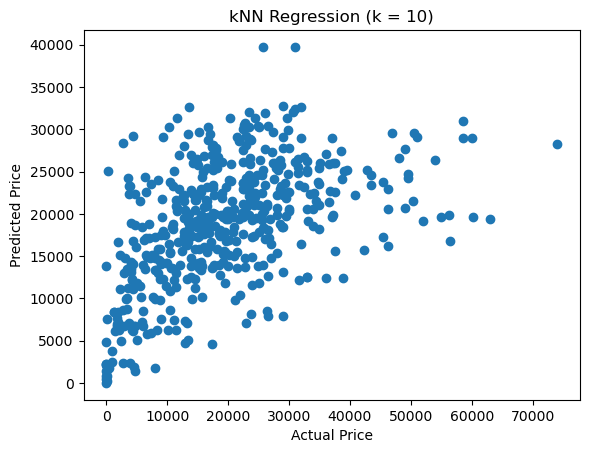

k = 25 MSE = 112576160.82390079


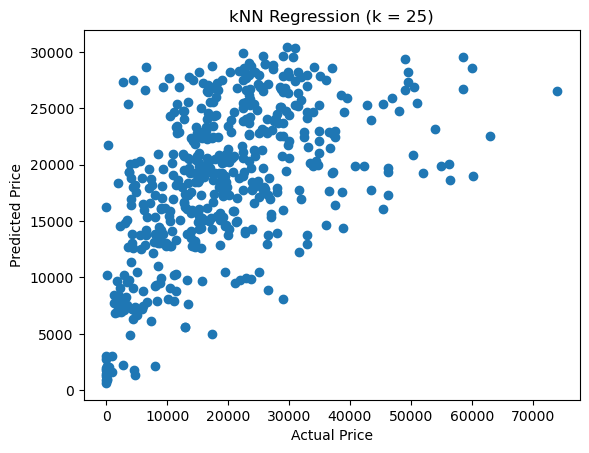

k = 50 MSE = 110202549.3014296


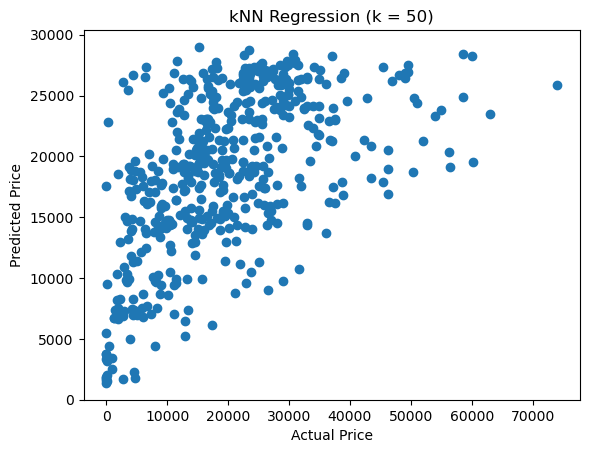

k = 100 MSE = 112253932.8184272


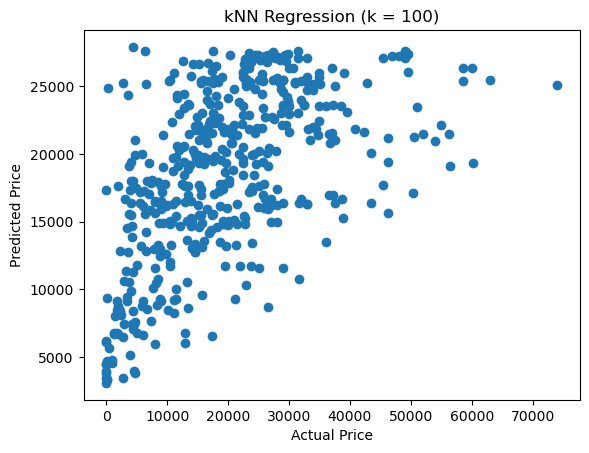

k = 300 MSE = 114496301.82933456


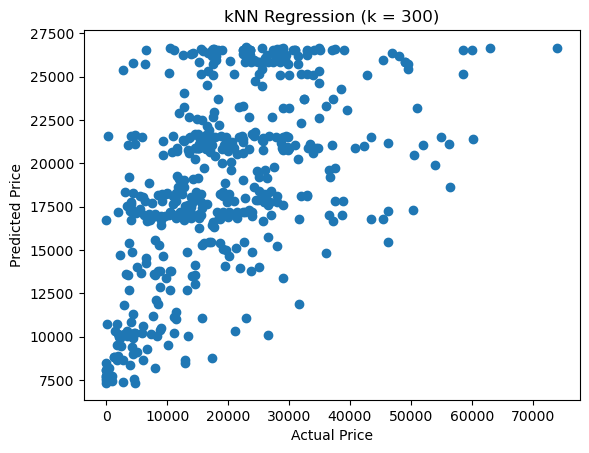

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

k_values = [3, 10, 25, 50, 100, 300]

results = []

for k in k_values:

    # Create model
    model = KNeighborsRegressor(n_neighbors=k)

    # Fit on training data
    model.fit(X_train, y_train)

    # Predict on test data
    y_pred = model.predict(X_test)

    # Compute MSE
    mse = mean_squared_error(y_test, y_pred)
    results.append((k, mse))

    print("k =", k, "MSE =", mse)

    # Scatterplot: Actual vs Predicted
    plt.figure()
    plt.scatter(y_test, y_pred)
    plt.xlabel("Actual Price")
    plt.ylabel("Predicted Price")
    plt.title(f"kNN Regression (k = {k})")
    plt.show()

As k increases:

Predictions become smoother.

Small k (e.g., 3) → predictions vary widely → possible overfitting.

Large k (e.g., 300) → predictions cluster near average → possible underfitting.

In [ ]:
# Convert to DataFrame
results_df = pd.DataFrame(results, columns=["k", "MSE"])

print(results_df)

# Find k with smallest MSE
best_row = results_df.loc[results_df["MSE"].idxmin()]
print("Optimal k:", best_row["k"])
print("Lowest MSE:", best_row["MSE"])

     k           MSE
0    3  1.480659e+08
1   10  1.173991e+08
2   25  1.125762e+08
3   50  1.102025e+08
4  100  1.122539e+08
5  300  1.144963e+08
Optimal k: 50.0
Lowest MSE: 110202549.3014296


In [ ]:
# When k is very small (e.g., 3), the model closely follows
# the training data and may overfit. This can lead to noisy,
# highly variable predictions.
#
# When k is very large (e.g., 300), the model averages many
# observations together and predictions become overly smooth.
# This causes underfitting because the model cannot capture
# meaningful variation in the data.
#
# The optimal k balances bias and variance, minimizing
# test MSE and producing predictions that follow the
# general trend without being overly noisy.

**Q6.** This is a case study using $k$ nearest neighbor regression for imputation, using the `airbnb_hw.csv` data.

There are 30,478 observations, but only 22,155 ratings. We're going to build a kNN regressor to impute missing values. This is a common task, and illustrates one way you can use kNN in the future even when you have more advanced models available.

1. Load the `airbnb_hw.csv` data with Pandas. We're only going to use `Review Scores Rating`, `Price`, and `Beds`, so use `.loc` to column filter the dataframe to those variables.
2. Set use `.isnull()` and `.loc` to select the subset of the dataframe with missing review values. Set those aside in a different dataframe. We'll make predictions about them later.
3. Use `df = df.dropna(axis = 0, how = 'any')` to eliminate any observations with missing values/NA's from the dataframe.
4. For the complete cases, create a $k$-NN model that uses the variables `Price` and `Beds` to predict `Review Scores Rating`. How do you choose $k$? (Hint: Train/test split, iterate over reasonable values of $k$ and find a value that minimizes SSE on the test split using predictions from the training set.)
5. Predict the missing ratings.
6. Do a kernel density plot of the training ratings and the predicted missing ratings. Do they look similar or not? Describe what you see.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("scratchpad/data/airbnb_hw.csv")

# Keep only needed columns using .loc
df = df.loc[:, ["Review Scores Rating", "Price", "Beds"]]

# Check dimensions and head
print("Shape:", df.shape)
print(df.head())

Shape: (30478, 3)
   Review Scores Rating Price  Beds
0                   NaN   145   1.0
1                   NaN    37   1.0
2                   NaN    28   1.0
3                   NaN   199   3.0
4                  96.0   549   3.0


In [ ]:
# Clean Price and Beds FIRST
df["Price"] = df["Price"].astype(str).str.replace(",", "", regex=False)
df["Price"] = pd.to_numeric(df["Price"], errors="coerce")
df["Beds"] = pd.to_numeric(df["Beds"], errors="coerce")

In [ ]:
# Select rows where review score is missing
missing_df = df.loc[df["Review Scores Rating"].isnull()].copy()

print("Missing review count:", missing_df.shape[0])

Missing review count: 8323


In [ ]:
# Drop any rows with NA values
df = df.dropna(axis=0, how='any')

print("Complete cases shape:", df.shape)

Complete cases shape: (22111, 3)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Define X and y
X = df[["Price", "Beds"]]
y = df["Review Scores Rating"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

# Try different k values
k_values = [3, 5, 10, 25, 50, 100]
results = []

for k in k_values:
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    # Compute SSE (sum of squared errors)
    sse = np.sum((y_test - y_pred) ** 2)

    results.append((k, sse))
    print("k =", k, "SSE =", sse)

# Convert to DataFrame
results_df = pd.DataFrame(results, columns=["k", "SSE"])
print(results_df)

# Choose k with smallest SSE
best_k = results_df.loc[results_df["SSE"].idxmin(), "k"]
print("Best k:", best_k)

k = 3 SSE = 484154.00000000006
k = 5 SSE = 400618.24000000005
k = 10 SSE = 350583.52
k = 25 SSE = 326850.28
k = 50 SSE = 321081.5788
k = 100 SSE = 317385.43799999997
     k          SSE
0    3  484154.0000
1    5  400618.2400
2   10  350583.5200
3   25  326850.2800
4   50  321081.5788
5  100  317385.4380
Best k: 100


We select the value of k that minimizes SSE on the test data, because this produces the smallest prediction errors on unseen data.

In [ ]:
print(df.columns)

Index(['Review Scores Rating', 'Price', 'Beds'], dtype='object')


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# Train final model on full complete dataset
final_model = KNeighborsRegressor(n_neighbors=int(best_k))
final_model.fit(X, y)

# Predict missing ratings:
# 1) Only keep rows where Price and Beds are NOT missing (kNN needs both features)
missing_X = missing_df[["Price", "Beds"]].dropna()

print("Rows with missing ratings:", missing_df.shape[0])
print("Rows we can predict (have Price & Beds):", missing_X.shape[0])

# 2) If there are no rows to predict, stop gracefully
if missing_X.shape[0] == 0:
    print("No missing ratings to predict (or missing Price/Beds for all of them).")
else:
    predicted_ratings = final_model.predict(missing_X)

    # Put predictions back into missing_df at the correct rows
    missing_df.loc[missing_X.index, "Predicted Rating"] = predicted_ratings

    print(missing_df.head())

Rows with missing ratings: 8323
Rows we can predict (have Price & Beds): 8282
    Review Scores Rating  Price  Beds  Predicted Rating
0                    NaN    145   1.0             94.06
1                    NaN     37   1.0             87.88
2                    NaN     28   1.0             86.19
3                    NaN    199   3.0             90.04
13                   NaN     68   1.0             90.07


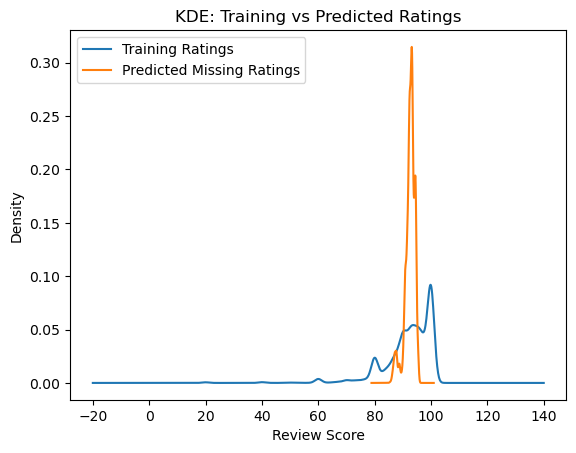

In [ ]:
# Plot KDE comparison
plt.figure()

# Training distribution
df["Review Scores Rating"].plot(kind="kde", label="Training Ratings")

# Predicted distribution
missing_df["Predicted Rating"].plot(kind="kde", label="Predicted Missing Ratings")

plt.xlabel("Review Score")
plt.title("KDE: Training vs Predicted Ratings")
plt.legend()
plt.show()

The distributions are not very similar. The predicted missing ratings are much more concentrated and have less spread than the training ratings. The training ratings show more variability, while the predicted values cluster around the average. This happens because kNN regression averages nearby observations, which smooths the predictions and reduces variance.